Задача:
    
Есть данные компании по доставке продуктов на дом. Сервис доступен как в приложении на ios, так и на android. Нужно  проанализировать поведение пользователей, а также оценить эффективность каналов их привлечения. 

Данные из AppMetrica за период с 1 января по 31 марта 2020, только по пользователям, зарегистрированным позднее 1 января 2020.

Описание данных 

- date – дата совершения события

- event - событие

        app_install – установка приложения
        app_start – открыть приложения
        registration – зарегистрироваться 
        search – перейти на страницу поиска товаров (каталог)
        open_item – открыть товар
        choose_item – отправить товар в корзину
        tap_basket – перейти в корзину
        purchase – подтверждение покупки

- gender – пол пользователя

- os_name – платформа пользователя

- city – город пользователя

- device_id – идентификатор устройства пользователя

- urm_source – канал, с которого пришел пользователь

        yandex-direct – Яндекс директ
        google_ads – реклама в Google
        vk_ads – реклама в ВК
        instagram_ads – реклама в instagram
        facebook_ads – реклама в facebook
        referral – акция «приведи друга»
        Если стоит ‘-’, то канал не определен или это скачивание приложения напрямую или посещение не с рекламы  
    
- purchase_sum – стоимость покупки (при совершении события ‘purchase’)

Обратите внимание на следующее:

- В выгрузке только уникальные действия пользователей за каждый день 

- Можно миновать стадию установки приложения, если оно было установлено ранее

- Можно миновать стадию регистрации, если пользователь был уже залогинен на момент сессии. Однако незарегистрированные пользователи не могут оформить покупку. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "C://Users/maksa/Downloads/KC_case_data .csv"
case_data = pd.read_csv(path, parse_dates=['date'])

In [3]:
case_data

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads
...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads


In [4]:
case_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747968 entries, 0 to 2747967
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   event         object        
 2   purchase_sum  float64       
 3   os_name       object        
 4   device_id     int64         
 5   gender        object        
 6   city          object        
 7   utm_source    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 167.7+ MB


In [5]:
case_data.isna().sum() 

date                  0
event                 0
purchase_sum    2606585
os_name               0
device_id             0
gender                0
city                  0
utm_source            0
dtype: int64

In [6]:
case_data.nunique()

date                91
event                7
purchase_sum      8775
os_name              2
device_id       190884
gender               2
city                 2
utm_source           7
dtype: int64

In [7]:
case_data.date.describe()

<ipython-input-7-203e51acf412>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  case_data.date.describe()


count                 2747968
unique                     91
top       2020-01-10 00:00:00
freq                    89831
first     2020-01-01 00:00:00
last      2020-03-31 00:00:00
Name: date, dtype: object

In [8]:
# организуем колонку: месяц
case_data['month'] = case_data['date'].dt.strftime("%Y-%m")

In [9]:
case_data

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01
...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03


MAU февраля:

    Месячная аудитория (MAU) — количество уникальных пользователей, которые зашли в приложение в течение месяца. 
    
По отношению средней дневной аудитории к месячной можно понимать частоту использования продукта.

In [10]:
case_data.query('month == "2020-02"').nunique()

date               29
event               7
purchase_sum     4358
os_name             2
device_id       75032
gender              2
city                2
utm_source          7
month               1
dtype: int64

MAU 2 = 75032

Количество установок в январе:


In [11]:
# app_install = 80297
case_data.query('month == "2020-01" and event == "app_install"').nunique()

date               31
event               1
purchase_sum        0
os_name             2
device_id       80297
gender              2
city                2
utm_source          7
month               1
dtype: int64

app_install январь  = 80297

Присвойте пользователям когорты по дню установки приложения и посчитайте для них  конверсию из установки в покупку в течение 7 дней. Для какой когорты конверсия была наибольшей? Ответ впишите в формате: дд.мм.гггг

Примечание: считаем пользователя сконвертировавшимся, если с момента установки до совершения первой покупки прошло не более 7 дней.

Конверсия (conversion rate, CR) — отношение числа пользователей, которые выполнили какое-либо целевое действие к
общему числу пользователей.


In [18]:
# установки
install = case_data.query('event == "app_install"')[['date', 'device_id']]

In [19]:
install

,date,device_id
2515061,2020-01-01,4921563
2515062,2020-01-01,1311583
2515063,2020-01-01,23006325
2515064,2020-01-01,5645652
2515065,2020-01-01,8798567
...,...,...
2669653,2020-03-31,19717968
2669654,2020-03-31,32966665
2669655,2020-03-31,6335964
2669656,2020-03-31,29155826


In [20]:
# покупки
purchase = case_data.query('event == "purchase"')[['date', 'device_id']]

In [21]:
purchase

,date,device_id
7691,2020-01-01,6081155
7692,2020-01-01,77448
7693,2020-01-01,7458607
7694,2020-01-01,3520947
7695,2020-01-01,1170605
...,...,...
2507469,2020-03-31,11864116
2507470,2020-03-31,3403969
2507471,2020-03-31,26120362
2507472,2020-03-31,22011351


In [22]:
install.rename(columns={'date' : 'cohort_inst'}, inplace=True)
purchase.rename(columns={'date' : 'cohort_purchase'}, inplace=True)

In [23]:
purchase.query('cohort_purchase <= "2020-01-08"').count()

cohort_purchase    7931
device_id          7931
dtype: int64

In [24]:
df = install.merge(purchase, on='device_id', how='left')

In [25]:
df # количество строк увеличилось т.к. на некоторые device_id несколько платежей. left join 

,cohort_inst,device_id,cohort_purchase
0,2020-01-01,4921563,2020-01-10
1,2020-01-01,4921563,2020-01-19
2,2020-01-01,4921563,2020-02-05
3,2020-01-01,4921563,2020-02-11
4,2020-01-01,4921563,2020-03-15
...,...,...,...
212359,2020-03-31,19717968,NaT
212360,2020-03-31,32966665,NaT
212361,2020-03-31,6335964,NaT
212362,2020-03-31,29155826,NaT


In [26]:
#df.isna().sum()

cohort_inst            0
device_id              0
cohort_purchase    97139
dtype: int64

In [22]:
# df.dropna(inplace=True)

In [23]:
#df

,cohort_inst,device_id,cohort_purchase
0,2020-01-01,4921563,2020-01-10
1,2020-01-01,4921563,2020-01-19
2,2020-01-01,4921563,2020-02-05
3,2020-01-01,4921563,2020-02-11
4,2020-01-01,4921563,2020-03-15
...,...,...,...
212340,2020-03-31,228794,2020-03-31
212351,2020-03-31,20224705,2020-03-31
212353,2020-03-31,1434534,2020-03-31
212356,2020-03-31,271586,2020-03-31


In [27]:
# удаляем не первые платежи
df = df.sort_values('cohort_purchase').drop_duplicates(subset=['device_id'], keep='first')

In [28]:
df = df.sort_values('cohort_inst')
df

,cohort_inst,device_id,cohort_purchase
11684,2020-01-01,26827118,2020-01-01
6307,2020-01-01,3396758,NaT
6309,2020-01-01,380902,NaT
6310,2020-01-01,14758223,NaT
2684,2020-01-01,12310737,2020-01-17
...,...,...,...
211510,2020-03-31,26605866,NaT
211511,2020-03-31,1470975,NaT
211513,2020-03-31,22402641,NaT
211472,2020-03-31,1011947,NaT


In [29]:
df['cohort_index'] = (df.cohort_purchase - df.cohort_inst).dt.days
df

,cohort_inst,device_id,cohort_purchase,cohort_index
11684,2020-01-01,26827118,2020-01-01,0.0
6307,2020-01-01,3396758,NaT,NaN
6309,2020-01-01,380902,NaT,NaN
6310,2020-01-01,14758223,NaT,NaN
2684,2020-01-01,12310737,2020-01-17,16.0
...,...,...,...,...
211510,2020-03-31,26605866,NaT,NaN
211511,2020-03-31,1470975,NaT,NaN
211513,2020-03-31,22402641,NaT,NaN
211472,2020-03-31,1011947,NaT,NaN


In [30]:
# в течение 7 дней. Для какой когорты конверсия была наибольшей? - 2020-01-01
df.query('cohort_index <= 7').groupby('cohort_inst').agg({'device_id':'nunique'}).sort_values('cohort_inst')

,device_id
cohort_inst,
2020-01-01,1408
2020-01-02,1186
2020-01-03,834
2020-01-04,639
2020-01-05,587
...,...
2020-03-27,277
2020-03-28,209
2020-03-29,223


Узнаем значение CR из предыдущего вопроса в %: конверсию из установки в покупку в течение 7 дней

In [31]:
# таблица с количеством установок по дням
devices = df.groupby('cohort_inst').agg({'device_id':'nunique'}).sort_values('cohort_inst')

In [32]:
#devices.index = devices.index.set_names(['cohort_inst'])
devices = devices.reset_index()
devices = devices.rename(columns={'device_id': 'devices'})
devices.head()

,cohort_inst,devices
0,2020-01-01,3579
1,2020-01-02,3144
2,2020-01-03,2402
3,2020-01-04,1831
4,2020-01-05,1671


In [35]:
# ответ: 
print('Конверсия из установки в покупку в течение 7 дней:  ', round(1408/3579*100, 2), '%')

Конверсия из установки в покупку в течение 7 дней:   39.34 %


Построим таблицу **Retention Rate**(по когортам) или показатель удержания клиентов:

In [36]:
cohort = df.groupby(['cohort_inst','cohort_index']) \
                .agg({'device_id':'nunique'})

In [37]:
# переводим индексы в названия колонок
# cohort.index = cohort.index.set_names(['cohort_inst','cohort_index'])
cohort = cohort.reset_index()

In [38]:
cohort

,cohort_inst,cohort_index,device_id
0,2020-01-01,0.0,736
1,2020-01-01,1.0,132
2,2020-01-01,2.0,137
3,2020-01-01,3.0,94
4,2020-01-01,4.0,77
...,...,...,...
3313,2020-03-29,1.0,14
3314,2020-03-29,2.0,6
3315,2020-03-30,0.0,200
3316,2020-03-30,1.0,4


In [308]:
#cohort = cohort.merge(devices[['cohort_inst','devices']], on='cohort_inst', how='left')

In [39]:
ret_rate = cohort.pivot(index='cohort_inst',columns='cohort_index',values='device_id').reset_index() #.rename_axis(None, axis=1)

In [318]:
# ret_rate = ret_rate.merge(devices[['cohort_inst','devices']], on='cohort_inst', how='left')

C:\Users\maksa\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [41]:
ret_rate.head()

cohort_index,cohort_inst,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0
0,2020-01-01,736.0,132.0,137.0,94.0,77.0,83.0,71.0,78.0,64.0,...,3.0,1.0,3.0,2.0,7.0,2.0,2.0,NaN,1.0,1.0
1,2020-01-02,682.0,97.0,72.0,95.0,83.0,56.0,49.0,52.0,71.0,...,2.0,2.0,3.0,1.0,2.0,1.0,1.0,NaN,NaN,1.0
2,2020-01-03,523.0,51.0,76.0,33.0,46.0,39.0,27.0,39.0,42.0,...,4.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
3,2020-01-04,384.0,73.0,27.0,35.0,24.0,30.0,33.0,33.0,21.0,...,1.0,NaN,2.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN
4,2020-01-05,377.0,51.0,25.0,30.0,23.0,28.0,22.0,31.0,19.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


In [42]:
# добавляем колонку со всеми инсталами в этот день, и меняем колонки местами (insert почему то не сработал...)
col = devices.devices
ret_rate['devices'] = col
ret_rate = ret_rate[ ['devices'] + [ col for col in ret_rate.columns if col != 'devices' ] ]          #  меняем колонки местами
ret_rate = ret_rate[ ['cohort_inst'] + [ col for col in ret_rate.columns if col != 'cohort_inst' ] ]  #  меняем колонки местами
ret_rate = ret_rate.set_index('cohort_inst')

In [45]:
ret_rate

cohort_index,devices,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0
cohort_inst,,,,,,,,,,,,,,,,,,,,,
2020-01-01,3579,736.0,132.0,137.0,94.0,77.0,83.0,71.0,78.0,64.0,...,3.0,1.0,3.0,2.0,7.0,2.0,2.0,NaN,1.0,1.0
2020-01-02,3144,682.0,97.0,72.0,95.0,83.0,56.0,49.0,52.0,71.0,...,2.0,2.0,3.0,1.0,2.0,1.0,1.0,NaN,NaN,1.0
2020-01-03,2402,523.0,51.0,76.0,33.0,46.0,39.0,27.0,39.0,42.0,...,4.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
2020-01-04,1831,384.0,73.0,27.0,35.0,24.0,30.0,33.0,33.0,21.0,...,1.0,NaN,2.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN
2020-01-05,1671,377.0,51.0,25.0,30.0,23.0,28.0,22.0,31.0,19.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,1199,259.0,11.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-28,1091,202.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,1117,203.0,14.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

<AxesSubplot:xlabel='cohort_index', ylabel='cohort_inst'>

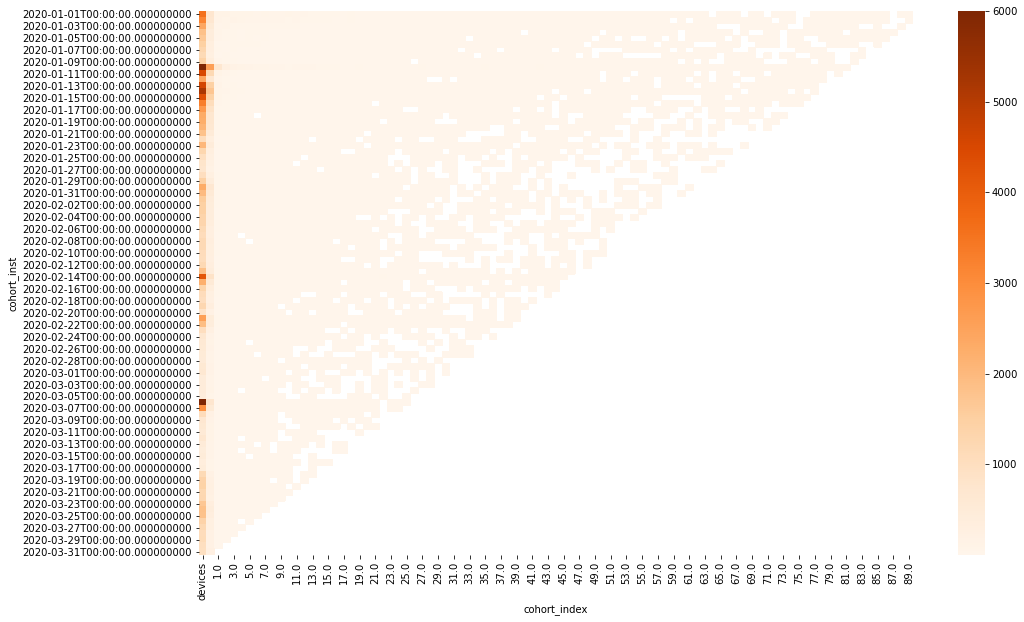

In [55]:
plt.figure(figsize=(16,10))
sns.heatmap(ret_rate, vmin=1, vmax=6000, cmap='Oranges')

С какого платного маркетингового канала пришло больше всего новых пользователей?  - yandex-direct	

In [58]:
case_data.groupby('utm_source').agg({'device_id':'nunique'}).sort_values('device_id')

,device_id
utm_source,
referal,15926
facebook_ads,25959
instagram_ads,31048
vk_ads,34086
google_ads,38096
yandex-direct,40712
-,52273


Проанализируйте на каком этапе воронки отваливается бОльшая часть клиентов. Посмотрите отдельно сценарии для зарегистрированных и для незарегистрированных пользователей. 
- На каком шаге отваливается больше всего зарегистрированных пользователей?
- Шаг конверсия из которого (в следующий шаг) самая низкая?

Для того, чтобы выделить группу тех, кому нужно и не нужно регистрироваться, добавьте колонку с датой регистрации. Если дата регистрации < даты совершения события, то пользователь уже зарегистрирован. 

    0. (0) app_install – установка приложения
    
    1. (0) app_start – открыть приложения
    2. (0) registration – зарегистрироваться 
    3. (1) search – перейти на страницу поиска товаров (каталог)
    4. (1.5) open_item – открыть товар
    5. (2) choose_item – отправить товар в корзину
    6. (3) tap_basket – перейти в корзину
    7. (4) purchase – подтверждение покупки

In [59]:
case_data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01


In [81]:
# новая таблица с событиями
events = case_data[['date','event', 'device_id']]

In [82]:
events.isna().sum()

date         0
event        0
device_id    0
dtype: int64

In [83]:
events.event.unique()

array(['app_start', 'choose_item', 'purchase', 'search', 'tap_basket',
       'app_install', 'register'], dtype=object)

In [84]:
# таблица с датами регистраций
register = events.query('event == "register"')
register

,date,event,device_id
2669658,2020-01-01,register,294193
2669659,2020-01-01,register,22917617
2669660,2020-01-01,register,15248490
2669661,2020-01-01,register,252062
2669662,2020-01-01,register,2251583
...,...,...,...
2747963,2020-03-31,register,2984778
2747964,2020-03-31,register,27301864
2747965,2020-03-31,register,1294285
2747966,2020-03-31,register,3010574


In [85]:
events = events.merge(register.drop(columns=['event']), on='device_id', how='left')
events.rename(columns={'date_y':'regstr'}, inplace=True)

In [87]:
events.isna().sum()

date_x            0
event             0
device_id         0
regstr       542002
dtype: int64

In [89]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747968 entries, 0 to 2747967
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   date_x     datetime64[ns]
 1   event      object        
 2   device_id  int64         
 3   regstr     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 104.8+ MB


In [90]:
no_regstr = events.query('regstr >= date_x')
no_regstr

,date_x,event,device_id,regstr
0,2020-01-01,app_start,669460,2020-01-07
1,2020-01-01,app_start,833621,2020-01-01
2,2020-01-01,app_start,1579237,2020-01-01
3,2020-01-01,app_start,1737182,2020-01-01
5,2020-01-01,app_start,5148476,2020-01-24
...,...,...,...,...
2747963,2020-03-31,register,2984778,2020-03-31
2747964,2020-03-31,register,27301864,2020-03-31
2747965,2020-03-31,register,1294285,2020-03-31
2747966,2020-03-31,register,3010574,2020-03-31


In [91]:
regstr = events.query('regstr < date_x')
regstr

,date_x,event,device_id,regstr
15148,2020-01-02,app_start,3163406,2020-01-01
15175,2020-01-02,app_start,2169108,2020-01-01
15197,2020-01-02,app_start,4863305,2020-01-01
15210,2020-01-02,app_start,15248490,2020-01-01
15214,2020-01-02,app_start,25617659,2020-01-01
...,...,...,...,...
2515051,2020-03-31,tap_basket,2421944,2020-02-27
2515053,2020-03-31,tap_basket,9985819,2020-03-24
2515054,2020-03-31,tap_basket,3043852,2020-03-30
2515056,2020-03-31,tap_basket,3162094,2020-01-13


In [107]:
regstr

,date_x,event,device_id,regstr
15148,2020-01-02,app_start,3163406,2020-01-01
15175,2020-01-02,app_start,2169108,2020-01-01
15197,2020-01-02,app_start,4863305,2020-01-01
15210,2020-01-02,app_start,15248490,2020-01-01
15214,2020-01-02,app_start,25617659,2020-01-01
...,...,...,...,...
2515051,2020-03-31,tap_basket,2421944,2020-02-27
2515053,2020-03-31,tap_basket,9985819,2020-03-24
2515054,2020-03-31,tap_basket,3043852,2020-03-30
2515056,2020-03-31,tap_basket,3162094,2020-01-13


In [94]:
CR_reg = regstr.groupby('event', as_index=False).agg({'device_id':'nunique'}).sort_values('device_id', ascending=False)
CR_reg

,event,device_id
0,app_start,40991
3,search,40482
1,choose_item,37926
4,tap_basket,34517
2,purchase,24880


In [95]:
CR_No_reg = no_regstr.groupby('event', as_index=False).agg({'device_id':'nunique'}).sort_values('device_id', ascending=False)
CR_No_reg

,event,device_id
1,app_start,78310
2,choose_item,78310
4,register,78310
5,search,78310
6,tap_basket,78310
3,purchase,67753
0,app_install,63526


In [98]:
# конверсия в действие относительно предыдущего действия (зарегистрированные пользователи)
i = 0
for i in range(CR_reg.event.size-1):
    x = (CR_reg.iloc[i+1,1])/(CR_reg.iloc[i,1])*100
    print('CR_reg in ',CR_reg.iloc[i+1,0],'   ', round(x, 2), '%')
    i=+i

CR_reg in  search     98.76 %
CR_reg in  choose_item     93.69 %
CR_reg in  tap_basket     91.01 %
CR_reg in  purchase     72.08 %


самая низкая конверсия из tap_basket в покупку - 72.08%


In [99]:
# конверсия в действие относительно первого действия (зарегистрированные пользователи)
i = 0
for i in range(CR_reg.event.size-1):
    x = (CR_reg.iloc[i+1,1])/(CR_reg.iloc[0,1])*100
    print('CR_reg in ',CR_reg.iloc[i+1,0],'   ', round(x, 2), '%')
    i=+i

CR_reg in  search     98.76 %
CR_reg in  choose_item     92.52 %
CR_reg in  tap_basket     84.21 %
CR_reg in  purchase     60.7 %


In [100]:
# конверсия в действие относительно предыдущего действия (НЕзарегистрированные пользователи)
i = 0
for i in range(CR_No_reg.event.size-1):
    x = (CR_No_reg.iloc[i+1,1])/(CR_No_reg.iloc[i,1])*100
    print('CR_No_reg in ',CR_No_reg.iloc[i+1,0],'   ', round(x, 2), '%')
    i=+i

CR_No_reg in  choose_item     100.0 %
CR_No_reg in  register     100.0 %
CR_No_reg in  search     100.0 %
CR_No_reg in  tap_basket     100.0 %
CR_No_reg in  purchase     86.52 %
CR_No_reg in  app_install     93.76 %


In [101]:
# конверсия в действие относительно первого действия (НЕзарегистрированные пользователи)
i = 0
for i in range(CR_No_reg.event.size-1):
    x = (CR_No_reg.iloc[i+1,1])/(CR_No_reg.iloc[0,1])*100
    print('CR_No_reg in ',CR_No_reg.iloc[i+1,0],'   ', round(x, 2), '%')
    i=+i

CR_No_reg in  choose_item     100.0 %
CR_No_reg in  register     100.0 %
CR_No_reg in  search     100.0 %
CR_No_reg in  tap_basket     100.0 %
CR_No_reg in  purchase     86.52 %
CR_No_reg in  app_install     81.12 %


Пользователи, пришедшие с каких каналов, показали самую низкую конверсию в **первую покупку**?


- CR = кол-во юзеров, впервые совершивших покупку/кол-во юзеров, впервые открывших приложение 

In [102]:
case_data.utm_source.unique()

array(['-', 'vk_ads', 'referal', 'facebook_ads', 'google_ads',
       'instagram_ads', 'yandex-direct'], dtype=object)

In [103]:
all_source = case_data[['date','event','device_id','utm_source']]

In [104]:
referal = all_source.query('utm_source == "referal"')
referal.head()

,date,event,device_id,utm_source
2,2020-01-01,app_start,1579237,referal
38,2020-01-01,app_start,14273869,referal
41,2020-01-01,app_start,29955403,referal
61,2020-01-01,app_start,27695630,referal
71,2020-01-01,app_start,3330346,referal


In [105]:
CR_refer = referal.groupby('event', as_index=False).agg({'device_id':'nunique'}).sort_values('device_id', ascending=False)

In [106]:
# функция: конверсия в действие относительно первого действия ()
def CR(df):
    i = 0
    for i in range(df.event.size-1):
        x = (df.iloc[i+1,1])/(df.iloc[0,1])*100
        print('CR_ in ', df.iloc[i+1,0],'   ', round(x, 2), '%')
        i=+i


In [107]:
CR(CR_refer)

CR_ in  search     96.45 %
CR_ in  choose_item     80.69 %
CR_ in  tap_basket     65.28 %
CR_ in  app_install     58.29 %
CR_ in  purchase     39.95 %
CR_ in  register     38.89 %


In [108]:
vk_ads = all_source.query('utm_source == "vk_ads"')
vk_ads.head()

,date,event,device_id,utm_source
1,2020-01-01,app_start,833621,vk_ads
6,2020-01-01,app_start,8383386,vk_ads
14,2020-01-01,app_start,12602468,vk_ads
22,2020-01-01,app_start,252062,vk_ads
23,2020-01-01,app_start,1576132,vk_ads


In [109]:
CR_vk_ads = vk_ads.groupby('event', as_index=False).agg({'device_id':'nunique'}).sort_values('device_id', ascending=False)
CR_vk_ads.head()

,event,device_id
1,app_start,34079
5,search,32713
2,choose_item,27001
0,app_install,23189
6,tap_basket,21440


In [110]:
CR(CR_vk_ads)

CR_ in  search     95.99 %
CR_ in  choose_item     79.23 %
CR_ in  app_install     68.04 %
CR_ in  tap_basket     62.91 %
CR_ in  register     36.45 %
CR_ in  purchase     36.28 %


In [111]:
facebook_ads = all_source.query('utm_source == "facebook_ads"')
CR_facebook_ads = facebook_ads.groupby('event', as_index=False).agg({'device_id':'nunique'}).sort_values('device_id', ascending=False)
CR(CR_facebook_ads)

CR_ in  search     96.17 %
CR_ in  choose_item     79.7 %
CR_ in  tap_basket     63.04 %
CR_ in  app_install     53.61 %
CR_ in  purchase     34.74 %
CR_ in  register     33.41 %


In [112]:
google_ads = all_source.query('utm_source == "google_ads"')
CR_google_ads = google_ads.groupby('event', as_index=False).agg({'device_id':'nunique'}).sort_values('device_id', ascending=False)
CR(CR_google_ads)

CR_ in  search     95.81 %
CR_ in  choose_item     77.43 %
CR_ in  app_install     69.01 %
CR_ in  tap_basket     59.3 %
CR_ in  register     29.94 %
CR_ in  purchase     29.77 %


In [113]:
instagram_ads = all_source.query('utm_source == "instagram_ads"')
CR_instagram_ads = instagram_ads.groupby('event', as_index=False).agg({'device_id':'nunique'}).sort_values('device_id', ascending=False)
CR(CR_instagram_ads)

CR_ in  search     96.01 %
CR_ in  choose_item     78.93 %
CR_ in  app_install     64.73 %
CR_ in  tap_basket     62.29 %
CR_ in  purchase     34.67 %
CR_ in  register     34.63 %


In [114]:
instagram_ads = all_source.query('utm_source == "instagram_ads"')\
                            .groupby('event', as_index=False)\
                            .agg({'device_id':'nunique'})\
                            .sort_values('device_id', ascending=False)
CR(instagram_ads)

CR_ in  search     96.01 %
CR_ in  choose_item     78.93 %
CR_ in  app_install     64.73 %
CR_ in  tap_basket     62.29 %
CR_ in  purchase     34.67 %
CR_ in  register     34.63 %


In [115]:
yandex_direct = all_source.query('utm_source == "yandex-direct"')\
                            .groupby('event', as_index=False)\
                            .agg({'device_id':'nunique'})\
                            .sort_values('device_id', ascending=False)
CR(yandex_direct)

CR_ in  search     95.85 %
CR_ in  choose_item     77.38 %
CR_ in  app_install     72.14 %
CR_ in  tap_basket     59.23 %
CR_ in  register     30.32 %
CR_ in  purchase     29.55 %


Пользователи, пришедшие с какого канала, имеют медианный первый чек выше? (учитываются только первые покупки пользователей)

In [116]:
case_data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01


In [118]:
all_purchase_sum = case_data[['date','event','purchase_sum','device_id','utm_source']]
all_purchase_sum

,date,event,purchase_sum,device_id,utm_source
0,2020-01-01,app_start,NaN,669460,-
1,2020-01-01,app_start,NaN,833621,vk_ads
2,2020-01-01,app_start,NaN,1579237,referal
3,2020-01-01,app_start,NaN,1737182,facebook_ads
4,2020-01-01,app_start,NaN,4029024,facebook_ads
...,...,...,...,...,...
2747963,2020-03-31,register,NaN,2984778,facebook_ads
2747964,2020-03-31,register,NaN,27301864,-
2747965,2020-03-31,register,NaN,1294285,google_ads
2747966,2020-03-31,register,NaN,3010574,google_ads


In [119]:
print('vk_sum = ')
all_purchase_sum.query('utm_source == "vk_ads" and event == "purchase"')\
                            .sort_values('date')\
                            .drop_duplicates(subset=['device_id'], keep='first')\
                            .purchase_sum.median()
                            

vk_sum = 


393.0

In [120]:
print('referal = ')
all_purchase_sum.query('utm_source == "referal" and event == "purchase"')\
                            .sort_values('date')\
                            .drop_duplicates(subset=['device_id'], keep='first')\
                            .purchase_sum.median()
                            

referal = 


395.0

In [121]:
print('facebook_ads = ')
all_purchase_sum.query('utm_source == "facebook_ads" and event == "purchase"')\
                            .sort_values('date')\
                            .drop_duplicates(subset=['device_id'], keep='first')\
                            .purchase_sum.median()

facebook_ads = 


390.5

In [122]:
print('google_ads = ')
all_purchase_sum.query('utm_source == "google_ads" and event == "purchase"')\
                            .sort_values('date')\
                            .drop_duplicates(subset=['device_id'], keep='first')\
                            .purchase_sum.median()

google_ads = 


390.0

In [123]:
print('yandex-direct = ')
all_purchase_sum.query('utm_source == "yandex-direct" and event == "purchase"')\
                            .sort_values('date')\
                            .drop_duplicates(subset=['device_id'], keep='first')\
                            .purchase_sum.median()

yandex-direct = 


392.5

In [124]:

print('instagram_ads = ')
all_purchase_sum.query('utm_source == "instagram_ads" and event == "purchase"')\
                            .sort_values('date')\
                            .drop_duplicates(subset=['device_id'], keep='first')\
                            .purchase_sum.median()

instagram_ads = 


393.5

Данные по затратам на рекламу:

Яндекс – 10 491 707 руб.

Гугл – 10 534 878 руб.

Фейсбук – 8 590 498 руб.

Инстаграм – 8 561626 руб.

ВК – 9 553 531руб.

не считаем! Расходы на реферальную программу: если пользователь приведет друга и последний совершит первую покупку, то оба получат по 100 рублей.

Какой платный канал привлечения имеет самый высокий ROMI? 

 - ROMI= (Валовая прибыль − Маркетинговые расходы) / Маркетинговые расходы

In [125]:
case_data.utm_source.unique()

array(['-', 'vk_ads', 'referal', 'facebook_ads', 'google_ads',
       'instagram_ads', 'yandex-direct'], dtype=object)

In [126]:
print('instagram_ads')
x = all_purchase_sum.query('utm_source == "instagram_ads" and event == "purchase"')\
                .purchase_sum.sum()
y = 8561626.0
(x-y)/y

instagram_ads


0.6990895187432854

In [127]:
print('vk_ads')
x = all_purchase_sum.query('utm_source == "vk_ads" and event == "purchase"')\
                .purchase_sum.sum()
y = 9553531.0
(x-y)/y

vk_ads


0.7155596710786828

In [128]:
print('yandex-direct')
x = all_purchase_sum.query('utm_source == "yandex-direct" and event == "purchase"')\
                .purchase_sum.sum()
y = 10491707.0
(x-y)/y

yandex-direct


0.3263206835646478

In [129]:
print('google_ads')
x = all_purchase_sum.query('utm_source == "google_ads" and event == "purchase"')\
                .purchase_sum.sum()
y = 10534878.0
(x-y)/y

google_ads


0.22149264566708793

In [130]:
print('facebook_ads')
x = all_purchase_sum.query('utm_source == "facebook_ads" and event == "purchase"')\
                .purchase_sum.sum()
y = 8590498.0
(x-y)/y

facebook_ads


0.4259826380263403